In [4]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


from sklearn import metrics



## Visualise Word Frequencies for Authors

In [5]:
file_name = '../data/victorian_author_sample_main_authors_train1.csv'
df_train = pd.read_csv(file_name, encoding="utf-8")

In [6]:
target_values = df_train['author']

In [7]:
uniquevalues = target_values.unique()

In [8]:
#lets have a look at some random authors in more detail
target_values[0]
max_int = target_values.size
author1 = df_train[df_train.author == uniquevalues[0]]
author2 = df_train[df_train.author == uniquevalues[1]]
author3 = df_train[df_train.author == uniquevalues[5]]
author4 = df_train[df_train.author == uniquevalues[6]]

In [9]:
author1.head()

,text,author,count
0,towards me and her little fingers round my han...,8,6914
6,up hill and down in an lock and when it come t...,8,6914
15,her marriage and that she is all but melanchol...,8,6914
19,of their project as agreed upon at this discus...,8,6914
27,was born and became a pillar of the church a v...,8,6914


In [10]:
author2.head()

,text,author,count
1,would hear later the names of their lost dead ...,39,2266
8,man my knees as long as i but he was his bay a...,39,2266
10,he thought blushing beneath the of the and day...,39,2266
14,it is fastened by a sort of button and which c...,39,2266
26,with a gasp and a howl and there was only a st...,39,2266


In [11]:
author3.head()

,text,author,count
12,as well from tlie elegant and expensive style ...,26,4441
21,character but if you are not equally convinced...,26,4441
22,confidence that is the part of the present sys...,26,4441
25,relied on the liberality of his intentions the...,26,4441
53,fellow and does not know how to drive i will a...,26,4441


In [12]:
def get_most_common_words(text):
#most common words the text

    min_df = 1
    max_df = 0.5
    count_vectorizer = CountVectorizer(stop_words='english', max_df=max_df, ngram_range=(1,3), max_features=300)
    #bag of words model minus alpha numeric characters and stop words
    count_vectorizer.fit_transform(text)
    #do the transform
    print('Performing word count transform using count vectoriser min doc frequency {} %  max doc frequency {}%'
          .format(min_df * 10, max_df*100))
    #now we have a bag of words matrix
    cur_word_count_vector = count_vectorizer.transform(text)

    print("Number of words")
    print(cur_word_count_vector.shape)
    print("Number of Ngrams in text")
    print(len(count_vectorizer.vocabulary_))
    sum_words = cur_word_count_vector.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    columns = ['word', 'freq']    
    df = pd.DataFrame(words_freq, columns=columns)
    return df


In [13]:
def visualise_word_frequency(df, category): 
    df[:20].plot(x='word', y='freq', kind='bar', title='word frequency for ' + category)

Performing word count transform using count vectoriser min doc frequency 10 %  max doc frequency 50.0%
Number of words
(5554, 300)
Number of Ngrams in text
300


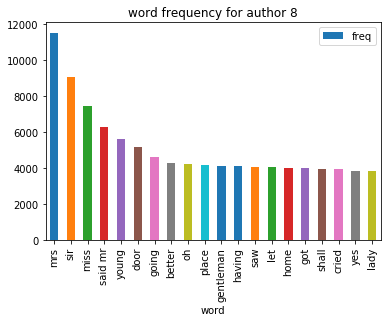

In [14]:
words_freq = get_most_common_words(author1.text)
authorno = author1.iloc[0].author
visualise_word_frequency(words_freq, 'author ' + str(authorno))

Performing word count transform using count vectoriser min doc frequency 10 %  max doc frequency 50.0%
Number of words
(1813, 300)
Number of Ngrams in text
300


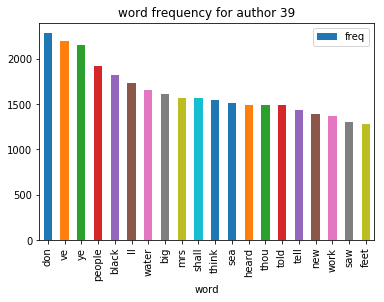

In [15]:
words_freq = get_most_common_words(author2.text)
authorno = author2.iloc[0].author
visualise_word_frequency(words_freq, 'author ' + str(authorno))

Performing word count transform using count vectoriser min doc frequency 10 %  max doc frequency 50.0%
Number of words
(3603, 300)
Number of Ngrams in text
300


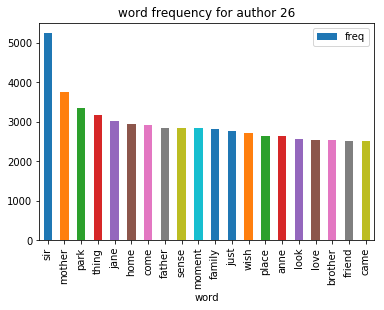

In [16]:
words_freq = get_most_common_words(author3.text)
authorno = author3.iloc[0].author
visualise_word_frequency(words_freq, 'author ' + str(authorno))



Performing word count transform using count vectoriser min doc frequency 10 %  max doc frequency 50.0%
Number of words
(1187, 300)
Number of Ngrams in text
300


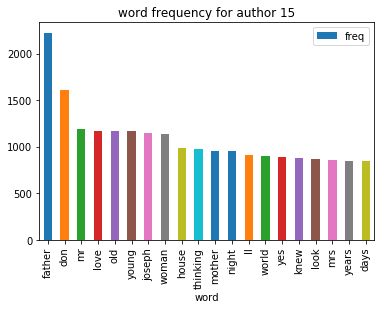

In [17]:
words_freq = get_most_common_words(author4.text)
authorno = author4.iloc[0].author
visualise_word_frequency(words_freq, 'author ' + str(authorno))